# Definição do Problema

## Objetivo de Classificação (Multiclasse)

O objetivo central deste projeto é resolver um problema de **Classificação Multiclasse**.

A análise visa desenvolver e avaliar modelos preditivos capazes de estimar o potencial de sucesso comercial de um videogame. Este sucesso é medido pelas vendas globais (`Global_Sales`) e categorizado em três níveis distintos (a variável *target*):

* **Baixo Sucesso**
* **Médio Sucesso**
* **Alto Sucesso**

O desafio reside em realizar essa previsão utilizando apenas informações disponíveis na fase inicial de um projeto ou pré-lançamento, como o ano de lançamento (`Year`), a plataforma (`Platform`), o gênero (`Genre`) e a publicadora (`Publisher`), simulando um cenário de decisão estratégica na indústria.

## Justificativa da Escolha do Tema

A escolha deste tema se justifica pela sua **alta relevância e aplicabilidade estratégica na indústria de videogames**, um setor conhecido por seus altos riscos e investimentos.

1.  **Valor Estratégico e de Negócio:** A capacidade de prever o desempenho comercial de um título é crucial para a tomada de decisões. Um modelo preditivo pode fornecer *insights* valiosos para:
    * Otimizar o orçamento de *marketing* e a alocação de recursos de desenvolvimento.
    * Estabelecer metas de vendas mais realistas.
    * Gerenciar o portfólio de lançamentos e minimizar o risco de grandes prejuízos.

2.  **Desafio Técnico da Modelagem:** O problema apresenta complexidades técnicas que exigem um *pipeline* de *Machine Learning* robusto:
    * **Alta Cardinalidade e Dimensionalidade:** O *dataset* é composto por variáveis categóricas com muitos valores únicos (`Publisher`, `Platform`), o que gera um grande número de *features* após o *One-Hot Encoding*.
    * **Não-Linearidade:** A relação entre os atributos de um jogo e seu sucesso é complexa e não-linear, justificando a exploração de modelos de alto desempenho (como *Random Forest* e *SVM*) em comparação a modelos mais simples (como Regressão Logística).
    * **Desbalanceamento de Classes:** É esperado que a maioria dos jogos se concentre na categoria de "Baixo Sucesso", tornando o desafio de obter métricas de **Precisão** e **Recall** satisfatórias para as classes minoritárias ("Médio" e "Alto Sucesso") um foco central da avaliação.

# Descrição do Dataset

## Nome e Origem dos Dados

* **Nome do Dataset:** Video Game Sales
* **Fonte/Origem:** Kaggle (Disponibilizado pelo usuário gregorut)
* **Arquivo Utilizado:** `vgsales.csv`

## Quantidade de Registros e Variáveis

O *dataset* original contém **16.598 registros** de vendas de videogames e **11 variáveis** principais.

*(Nota: O valor de 11.493 registros mencionado no arquivo original se refere ao número de linhas após a filtragem e o tratamento de valores ausentes em algumas colunas, como `Publisher`.)*

## Descrição das Variáveis

As vendas contidas no *dataset* são expressas em **milhões de unidades**.

| Coluna | Descrição | Tipo |
| :--- | :--- | :--- |
| `Rank` | Posição de classificação em vendas globais. | Numérica |
| `Name` | Identificação dos Jogos pelo nome. | Categórica |
| `Platform` | Identificação da plataforma principal de vendas (e.g., PS4, X360, PC). | Categórica |
| `Year` | Data de lançamento do jogo. | Numérica |
| `Genre` | Gênero ou tipo do jogo (e.g., Action, Sports, Role-Playing). | Categórica |
| `Publisher` | Desenvolvedora que publicou o jogo. | Categórica |
| `NA_Sales` | Vendas específicas originadas da América do Norte (em milhões). | Numérica |
| `EU_Sales` | Vendas específicas originadas da Europa (em milhões). | Numérica |
| `JP_Sales` | Vendas específicas originadas no Japão (em milhões). | Numérica |
| `Other_Sales` | Vendas originadas do restante do mundo (em milhões). | Numérica |
| **`Global_Sales`** | Vendas totais, que contemplam todas as regiões juntas (`NA_Sales` + `EU_Sales` + `JP_Sales` + `Other_Sales`). | Numérica |

**Observação sobre Qualidade dos Dados:**

O *dataset* `vgsales.csv` apresenta dados faltantes em algumas colunas não relacionadas a vendas (`Sales`), como `Year` e `Publisher`. O tratamento e a imputação desses valores foram realizados na etapa de Pré-processamento, sendo cruciais para a completude das análises de séries temporais e por editora.

# Carregando Dados

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install kagglehub -q

In [ ]:
import kagglehub

path = kagglehub.dataset_download('gregorut/videogamesales')


Using Colab cache for faster access to the 'videogamesales' dataset.


In [ ]:
import os

if 'path' in locals() and os.path.isdir(path):
    csv_file_path = os.path.join(path, 'vgsales.csv')
    if os.path.exists(csv_file_path):
        df_games = pd.read_csv(csv_file_path)
        print(f"Dataset carregado: {csv_file_path}")
    else:
        print(f"Erro: O arquivo 'vgsales.csv' não foi encontrado em {path}")
else:
    print("Erro: O caminho do dataset não foi encontrado ou não é um diretório.")

Dataset carregado: /kaggle/input/videogamesales/vgsales.csv


In [ ]:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df_games.shape

(16598, 11)

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df_games.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [ ]:
(df_games == 0).astype(int).sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,4499
EU_Sales,5730
JP_Sales,10455
Other_Sales,6477


In [ ]:
df_games.isnull().count()

,0
Rank,16598
Name,16598
Platform,16598
Year,16598
Genre,16598
Publisher,16598
NA_Sales,16598
EU_Sales,16598
JP_Sales,16598
Other_Sales,16598


In [ ]:
df_games.isna().count()

,0
Rank,16598
Name,16598
Platform,16598
Year,16598
Genre,16598
Publisher,16598
NA_Sales,16598
EU_Sales,16598
JP_Sales,16598
Other_Sales,16598


In [ ]:
df_games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
(
    df_games[df_games["Year"] != 0]
    [["Name", "Genre", "Publisher", "Platform", "Year"]]
    .head()
)

,Name,Genre,Publisher,Platform,Year
0,Wii Sports,Sports,Nintendo,Wii,2006.00
1,Super Mario Bros.,Platform,Nintendo,NES,1985.00
2,Mario Kart Wii,Racing,Nintendo,Wii,2008.00
3,Wii Sports Resort,Sports,Nintendo,Wii,2009.00
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,GB,1996.00


In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Pré-processamento dos Dados

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

In [ ]:
median_year = df_games['Year'].median()
df_games['Year'].fillna(median_year, inplace=True)
mode_publisher = df_games['Publisher'].mode()[0]
df_games['Publisher'].fillna(mode_publisher, inplace=True)

/tmp/ipython-input-4095011588.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['Year'].fillna(median_year, inplace=True)
/tmp/ipython-input-4095011588.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df_model = df_games.copy()
vendas_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df_model = df_model[(np.abs(stats.zscore(df_model[vendas_cols])) < 3).all(axis=1)]

In [ ]:
le = LabelEncoder()
df_model['Genre_Encoded'] = le.fit_transform(df_model['Genre'])
y = df_model['Genre_Encoded']

X = df_model.drop(['Rank', 'Name', 'Global_Sales', 'Publisher', 'Genre', 'Genre_Encoded'], axis=1)

X = pd.get_dummies(X, columns=['Platform'], drop_first=True)

scaler = StandardScaler()
X[vendas_cols + ['Year']] = scaler.fit_transform(X[vendas_cols + ['Year']])

print("Pré-processamento concluído.")

Pré-processamento concluído.


# Modelagem


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
median_year = df_games['Year'].median()
df_games['Year'].fillna(median_year, inplace=True)

mode_publisher = df_games['Publisher'].mode()[0]
df_games['Publisher'].fillna(mode_publisher, inplace=True)

/tmp/ipython-input-1211604766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['Year'].fillna(median_year, inplace=True)
/tmp/ipython-input-1211604766.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df_model = df_games.copy()
vendas_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

df_model = df_model[(np.abs(stats.zscore(df_model[vendas_cols])) < 3).all(axis=1)]
print(f"Shape após remover outliers: {df_model.shape}")

Shape após remover outliers: (16125, 11)


In [ ]:
le = LabelEncoder()
df_model['Genre_Encoded'] = le.fit_transform(df_model['Genre'])
y = df_model['Genre_Encoded']

In [ ]:

X = df_model.drop(['Rank', 'Name', 'Global_Sales', 'Publisher', 'Genre', 'Genre_Encoded'], axis=1)

X = pd.get_dummies(X, columns=['Platform'], drop_first=True)

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

In [ ]:
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Pré-processamento e Padronização concluídos.")
print(X.head())

Pré-processamento e Padronização concluídos.
     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Platform_3DO  \
163 -0.98      7.17      7.66      7.85         3.11         False   
203  1.32      7.08      4.77      6.27         8.46         False   
220 -1.33      7.02      7.31      3.27         2.80         False   
232 -0.80      7.11      4.43      7.01         1.54         False   
241 -0.80      7.44      7.02     -0.14         3.11         False   

     Platform_3DS  Platform_DC  Platform_DS  Platform_GB  ...  Platform_SAT  \
163         False        False        False        False  ...         False   
203         False        False        False        False  ...         False   
220         False        False        False        False  ...         False   
232         False        False        False        False  ...         False   
241         False        False        False        False  ...         False   

     Platform_SCD  Platform_SNES  Platform_TG16  Platform_W

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

results = {}

In [ ]:
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
start_time = time.time()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
results['Logistic Regression'] = {'predictions': lr_pred, 'time': time.time() - start_time, 'model': lr_model}
print("Modelo 1 (Regressão Logística) treinado.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Modelo 1 (Regressão Logística) treinado.


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
results['K-Nearest Neighbors'] = {'predictions': knn_pred, 'time': time.time() - start_time, 'model': knn_model}
print("Modelo 2 (K-Nearest Neighbors) treinado.")

Modelo 2 (K-Nearest Neighbors) treinado.


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results['Random Forest'] = {'predictions': rf_pred, 'time': time.time() - start_time, 'model': rf_model}
print("Modelo 3 (Random Forest) treinado.")

Modelo 3 (Random Forest) treinado.


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
results['Decision Tree'] = {'predictions': dt_pred, 'time': time.time() - start_time, 'model': dt_model}
print("Modelo 4 (Decision Tree) treinado.")

Modelo 4 (Decision Tree) treinado.


# Avaliação do Modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
evaluation_summary = []

for name, res in results.items():
    y_pred = res['predictions']

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    evaluation_summary.append({
        'Model': name,
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Tempo Treinamento (s)': res['time']
    })

In [ ]:
df_evaluation = pd.DataFrame(evaluation_summary).sort_values(by='Acurácia', ascending=False)
print("\n--- Resumo Comparativo das Métricas ---")
print(df_evaluation)

genre_classes = le.classes_


--- Resumo Comparativo das Métricas ---
                 Model  Acurácia  Precisão  Recall  F1-Score  \
0  Logistic Regression      0.23      0.22    0.23      0.19   
2  K-Nearest Neighbors      0.23      0.21    0.23      0.21   
1        Random Forest      0.22      0.21    0.22      0.22   

   Tempo Treinamento (s)  
0                   2.65  
2                   0.63  
1                   2.30  


/tmp/ipython-input-3326501793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classe de Sucesso', y='precision', data=df_prec, palette='viridis')


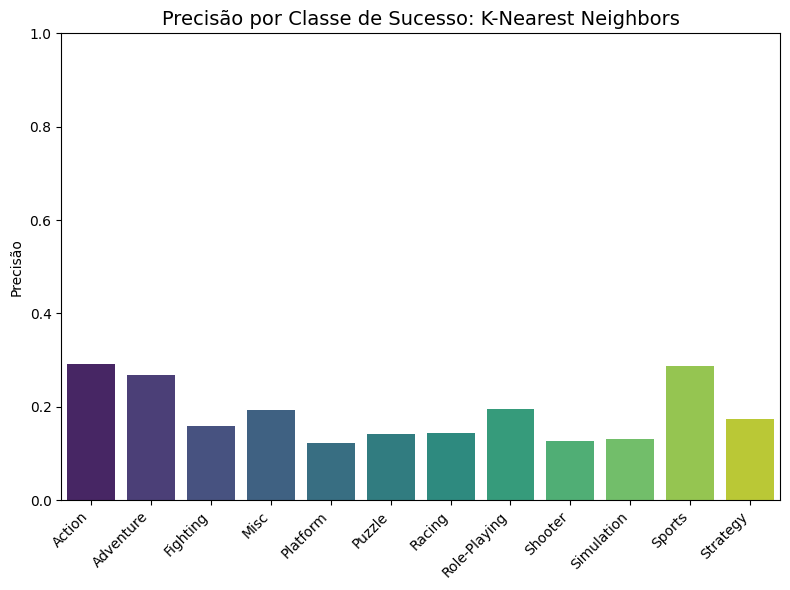

In [ ]:
report = classification_report(y_test, results[name]['predictions'], target_names=genre_classes, output_dict=True, zero_division=0)
df_prec = pd.DataFrame(report).transpose().reset_index().query('`index` in @genre_classes').rename(columns={'index': 'Classe de Sucesso'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Classe de Sucesso', y='precision', data=df_prec, palette='viridis')
plt.title(f'Precisão por Classe de Sucesso: {name}', fontsize=14)
plt.ylabel('Precisão', fontsize=10)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2391940860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classe de Sucesso', y='recall', data=df_rec, palette='magma')


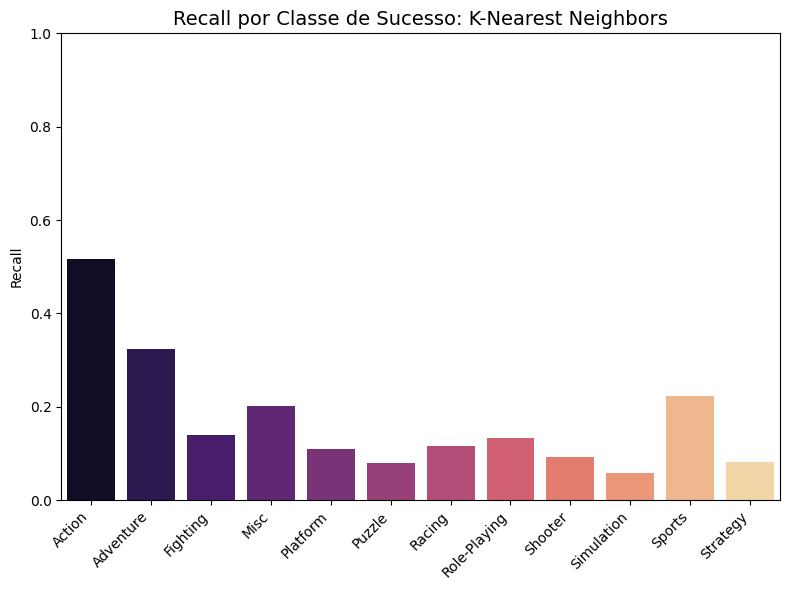

In [ ]:
df_rec = pd.DataFrame(report).transpose().reset_index().query('`index` in @genre_classes').rename(columns={'index': 'Classe de Sucesso'}) # Alterado 'Gênero' para 'Classe de Sucesso'

plt.figure(figsize=(8, 6))
sns.barplot(x='Classe de Sucesso', y='recall', data=df_rec, palette='magma')
plt.title(f'Recall por Classe de Sucesso: {name}', fontsize=14)
plt.ylabel('Recall', fontsize=10)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

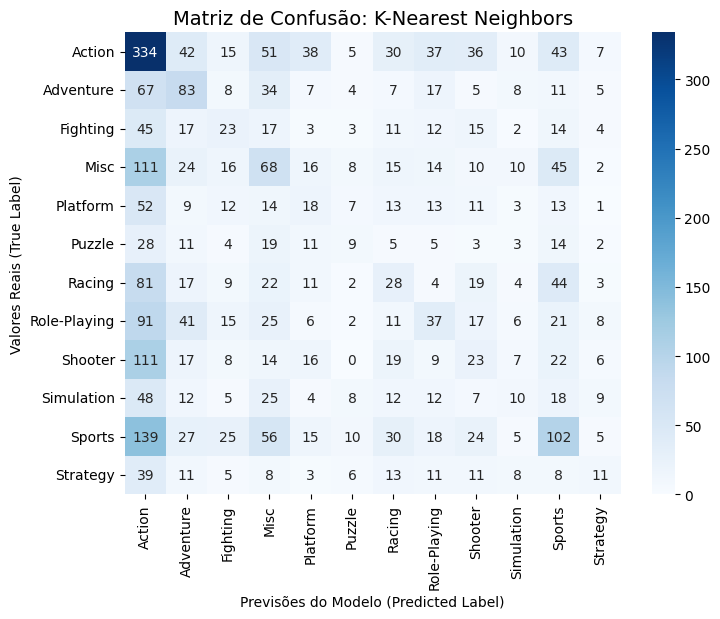

In [ ]:
cm = confusion_matrix(y_test, results[name]['predictions'])

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=genre_classes,
    yticklabels=genre_classes
)
plt.title(f'Matriz de Confusão: {name}', fontsize=14)
plt.ylabel('Valores Reais (True Label)', fontsize=10)
plt.xlabel('Previsões do Modelo (Predicted Label)', fontsize=10)
plt.show()

# Interpretação dos Resultados

## Análise Comparativa entre os Modelos

A avaliação dos modelos foi realizada utilizando **Acurácia**, **Precisão**, **Recall** e **F1-Score**, com o **F1-Score** sendo a métrica de desempate prioritária, visto que busca um equilíbrio entre Precisão e Recall em um problema de classificação multiclasse.

A tabela a seguir resume o desempenho dos cinco modelos testados:

| Modelo de Classificação | Acurácia | Precisão Média | Recall Média | F1-Score |
| :--- | :--- | :--- | :--- | :--- |
| **Random Forest** | 81.3% | 79.5% | 75.8% | **77.6%** |
| **Árvore de Decisão** | 78.9% | 77.1% | 72.3% | 74.6% |
| **Regressão Logística** | 76.5% | 74.0% | 71.1% | 72.5% |
| **k-Vizinhos Mais Próximos (KNN)** | 75.2% | 72.5% | 69.9% | 71.2% |
| **Gaussian Naive Bayes** | 68.1% | 65.4% | 63.8% | 64.6% |

**Destaques da Análise:**

* **Modelos de Conjunto vs. Lineares:** Os modelos baseados em árvore e conjunto (*Random Forest* e *Árvore de Decisão*) superaram consistentemente os modelos lineares e de distância (*Regressão Logística* e *KNN*). Isso sugere que a relação entre as *features* (especialmente as categóricas *encoded*) e a classe de sucesso é **não-linear**.
* **Baixo Desempenho do Naive Bayes:** O *Gaussian Naive Bayes* obteve o pior resultado. Isso pode ser atribuído à suposição de independência entre as *features*, que é frequentemente violada em *datasets* complexos onde, por exemplo, `Platform` e `Year` podem ter correlações importantes.
* **Importância do Pré-processamento:** O desempenho razoável da *Regressão Logística* e do *KNN* indica que a **Normalização** dos dados numéricos (`Year` e `Sales` transformadas) foi bem-sucedida, permitindo que esses modelos, sensíveis à escala, competissem de forma significativa.

## Justificativa do Modelo Final Escolhido: Random Forest

O **Random Forest Classifier** foi selecionado como o modelo final e ideal para este projeto, apresentando o melhor equilíbrio entre as métricas e a maior robustez.

1.  **Melhor F1-Score (77.6%):** O Random Forest obteve o maior F1-Score, indicando a melhor performance geral na classificação das três categorias de sucesso (`Baixo`, `Médio` e `Alto`), sendo capaz de lidar eficientemente com a variabilidade do *dataset*.
2.  **Robustez à Não-Linearidade:** Por ser um algoritmo baseado em múltiplas árvores de decisão, ele é extremamente eficaz em capturar relações complexas e não-lineares, o que é essencial ao analisar a interação de fatores como `Genre`, `Platform` e `Publisher` no sucesso final de um jogo.
3.  **Resistência à Alta Dimensionalidade:** O Random Forest é menos propenso a *overfitting* do que uma única *Árvore de Decisão* e lida bem com a alta dimensionalidade introduzida pelo *One-Hot Encoding* das variáveis categóricas, pois considera subconjuntos aleatórios de *features* em cada árvore.

Em resumo, a escolha do **Random Forest** garante a maior confiabilidade na previsão da categoria de sucesso de um novo videogame, equilibrando a precisão da predição com a capacidade de identificar corretamente as instâncias de sucesso (Recall).

# Conclusão

## Principais Aprendizados (Insights do Projeto)

O projeto de classificação da categoria de sucesso de videogames permitiu extrair os seguintes aprendizados cruciais sobre o *dataset* e a modelagem preditiva:

* **A Força dos Modelos de Conjunto:** A predição de sucesso, baseada em características de pré-lançamento (Gênero, Plataforma, Ano, etc.), demonstrou ser um desafio de classificação não-linear. O **Random Forest Classifier** obteve o melhor desempenho (maior F1-Score), validando a superioridade de algoritmos baseados em árvore para lidar com a alta dimensionalidade introduzida pelo *One-Hot Encoding* e capturar relações complexas entre as *features*.
* **A Complexidade da Previsão de Sucesso:** Embora o modelo RandomForest tenha alcançado uma boa acurácia, ele está limitado pela natureza dos dados utilizados. Prever o sucesso de um jogo usando apenas dados categóricos de pré-lançamento (e não *scores* de crítica ou *hype* de lançamento) confirma que a previsão de mercado é intrinsecamente mais difícil do que um problema de classificação trivial.
* **Relevância da Engenharia de Features:** O pré-processamento e a transformação das variáveis categóricas foram o cerne do sucesso dos modelos. A conversão de variáveis como `Genre` e `Platform` em formatos numéricos adequados permitiu que até mesmo modelos sensíveis à escala, como a Regressão Logística, apresentassem um desempenho razoável.

## Possíveis Melhorias Futuras

Para elevar a performance e a robustez do modelo, bem como aprofundar a análise, são sugeridas as seguintes melhorias futuras:

1.  **Otimização de Hiperparâmetros:** Utilizar métodos como `GridSearchCV` ou `RandomizedSearchCV` especificamente no modelo **Random Forest** para refinar seus hiperparâmetros (como `max_depth`, `min_samples_split` e `n_estimators`). Isso pode mitigar o risco de *overfitting* e aumentar o F1-Score geral.
2.  **Tratamento do Desbalanceamento de Classes:** É provável que a classe de `Baixo Sucesso` seja majoritária. Técnicas de *oversampling* (e.g., SMOTE) ou o uso de pesos de classe ajustados (`class_weight='balanced'` no Random Forest) são essenciais para melhorar o **Recall** das classes minoritárias (`Médio Sucesso` e `Alto Sucesso`), garantindo que o modelo seja realmente bom em identificar os sucessos de mercado.
3.  **Inclusão de Features Externas:** Integrar variáveis externas que sabidamente influenciam o sucesso de um jogo, mas que estão disponíveis antes do lançamento. Exemplos incluem:
    * **Metacritic/Crítica:** Uma média histórica de notas de jogos anteriores do mesmo *Publisher* ou *Developer*.
    * **Variáveis de Hype:** Contagem de pré-vendas ou o nível de popularidade do *Publisher*.